In [8]:
import pandas as pd
import numpy as np

# Reading Data 

In [9]:
train = pd.read_csv("Assignment2_train.csv")
test = pd.read_csv("Assignment2_test.csv")

In [10]:
train.head()

,index,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,1,26,White,Male,Some-college,a_2,b_4,c_0,d_39,e_4,53833,10,0,0,42,0
1,2,35,White,Male,Some-college,a_2,b_3,c_0,d_39,e_4,67728,10,0,2051,45,0
2,3,61,White,Male,HS-grad,a_2,b_12,c_0,d_39,e_6,268831,9,0,0,53,0
3,4,48,Asian-Pac-Islander,Female,Bachelors,a_5,b_1,c_4,d_30,e_4,238360,13,0,0,40,0
4,5,20,White,Male,Some-college,a_4,b_6,c_3,d_39,e_4,199011,10,0,0,12,0


In [11]:
# drop index column 
train = train.drop(columns=["index"])

In [12]:
train.head()

,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,26,White,Male,Some-college,a_2,b_4,c_0,d_39,e_4,53833,10,0,0,42,0
1,35,White,Male,Some-college,a_2,b_3,c_0,d_39,e_4,67728,10,0,2051,45,0
2,61,White,Male,HS-grad,a_2,b_12,c_0,d_39,e_6,268831,9,0,0,53,0
3,48,Asian-Pac-Islander,Female,Bachelors,a_5,b_1,c_4,d_30,e_4,238360,13,0,0,40,0
4,20,White,Male,Some-college,a_4,b_6,c_3,d_39,e_4,199011,10,0,0,12,0


Import Label Encoder - To turn categorical variables into numericals

In [13]:
from sklearn import preprocessing

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
cat_cols = ['race','sex','education','f1','f2','f3','f4','f5']
train[cat_cols] = train[cat_cols].apply(label_encoder.fit_transform)


In [16]:
train.head()

,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,26,4,1,15,2,9,0,32,4,53833,10,0,0,42,0
1,35,4,1,15,2,8,0,32,4,67728,10,0,2051,45,0
2,61,4,1,11,2,4,0,32,6,268831,9,0,0,53,0
3,48,1,0,9,5,1,4,23,4,238360,13,0,0,40,0
4,20,4,1,15,4,11,3,32,4,199011,10,0,0,12,0


In [17]:
# target data 
y = train['y']

# features 
x = train.iloc[:,:-1]



In [18]:
# check for null values 
x.isnull().sum()
# do not have missing values 

age          0
race         0
sex          0
education    0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
f7           0
f8           0
f9           0
f10          0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
# split dataset into training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=23)

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report


In [17]:
# function to print out model's classification results 
def get_model_results(classifier, model, x_train, y_train, x_test, y_test):
    # fit the model with data 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))


# Logistic Regression 

In [18]:

from sklearn.linear_model import LogisticRegression


In [19]:
# instantiate log reg model
log_model = LogisticRegression(random_state=101)

In [20]:

get_model_results("Logistic Regression", log_model, x_train, y_train, x_val, y_val )


Results for Logistic Regression
Accuracy: 0.7920692684151085
Recall: 0.3037974683544304
Precision: 0.6308871851040526
F1 Score: 0.41011035955856184

Confusion Matrix:

[[ 576 1320]
 [ 337 5736]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6073
           1       0.63      0.30      0.41      1896

    accuracy                           0.79      7969
   macro avg       0.72      0.62      0.64      7969
weighted avg       0.77      0.79      0.76      7969



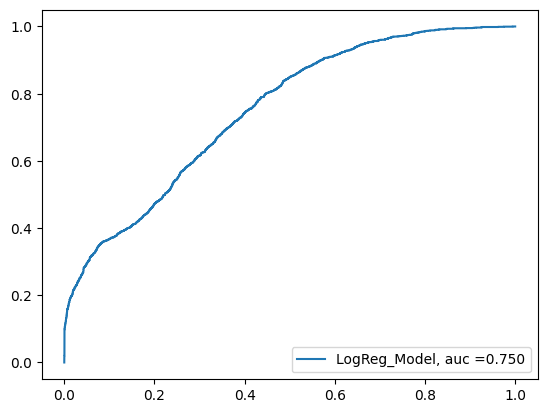

In [21]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
y_pred_prob_logmodel = log_model.predict_proba(x_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_prob_logmodel)
auc = metrics.roc_auc_score(y_val, y_pred_prob_logmodel)
plt.plot(fpr,tpr,label="LogReg_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()


In [32]:
num_0 = (train['y'] == 0).sum()
num_1 = (train['y'] == 1).sum() 
total = num_0 + num_1

print("Number of Y Outcome = 0:" , num_0)
print("Number of Y Outcome = 1:", num_1)

print("Percentage of Y Outcome = 0:" , num_0/total * 100, "%")
print("Percentage of Y Outcome = 1:", num_1/total * 100, "%")


Number of Y Outcome = 0: 20194
Number of Y Outcome = 1: 6367
Percentage of Y Outcome = 0: 76.0287639772599 %
Percentage of Y Outcome = 1: 23.971236022740108 %


As seen above, the dataset is not balanced, where the number of Y variables = 0 makes up 76% of the total outcome variables, while that for Y is only 24%. Thus, there is a bias towards the outcome variable 0. Thus, it is essential to balance the dataset to make training the model easier as it helps prevent bias towards a particular outcome variable. 

Balancing the data

In [22]:
# group by the y variable 
group_y = train.groupby('y')
print(group_y)
bal_data = group_y.apply(lambda x:x.sample(group_y.size().min()).reset_index(drop=True))
bx_train, bx_val, by_train, by_val = train_test_split(bal_data.iloc[:,:-1],bal_data['y'], test_size=0.3, random_state=23)

In [23]:
get_model_results("Logistic Regression (Balanced)", log_model, bx_train,by_train,bx_val,by_val  )


Results for Logistic Regression (Balanced)
Accuracy: 0.6835906830672599
Recall: 0.6437632135306554
Precision: 0.6948088990302339
F1 Score: 0.6683127572016462

Confusion Matrix:

[[1218  674]
 [ 535 1394]]

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1929
           1       0.69      0.64      0.67      1892

    accuracy                           0.68      3821
   macro avg       0.68      0.68      0.68      3821
weighted avg       0.68      0.68      0.68      3821



/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Grid Search to get the best parameters 


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [90,100]
}

gridCV = GridSearchCV(log_model, param_grid=grid_params, verbose=False)
gridCV.fit(bx_train,by_train)

In [ ]:
print(gridCV.best_params_)

{'C': 0.23357214690901212, 'max_iter': 90, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
good_log_model = LogisticRegression(C=0.23357214690901212, max_iter = 90, penalty='l1', solver = "liblinear", random_state=101)

In [ ]:

get_model_results("Logistic Regression (HyperTuned)",good_log_model, bx_train,by_train,bx_val,by_val )


Results for Logistic Regression (HyperTuned)
Accuracy: 0.7639361423711071
Recall: 0.7679704016913319
Precision: 0.7583507306889353
F1 Score: 0.7631302521008403

Confusion Matrix:

[[1453  439]
 [ 463 1466]]

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1929
           1       0.76      0.77      0.76      1892

    accuracy                           0.76      3821
   macro avg       0.76      0.76      0.76      3821
weighted avg       0.76      0.76      0.76      3821



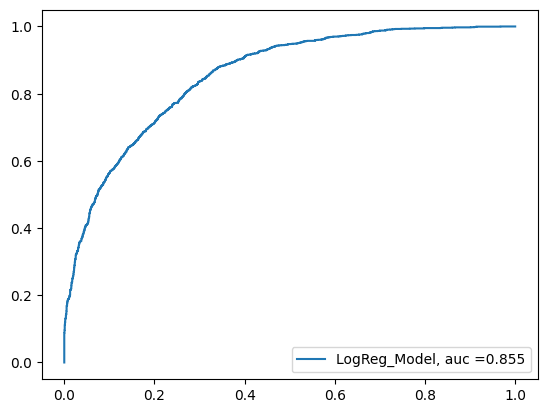

In [ ]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodlogmodel = good_log_model.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodlogmodel)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodlogmodel)
plt.plot(fpr,tpr,label="LogReg_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()


# Support Vector Machine 

In [36]:
from sklearn import svm 

In [54]:

# create svm Classifier with basic linear kernel 
linearSVM = svm.SVC(kernel="linear",probability=True)

In [56]:

get_model_results("Linear SVM", linearSVM, bx_train, by_train, bx_val,by_val)


Results for Linear SVM
Accuracy: 0.7126406699816802
Recall: 0.653276955602537
Precision: 0.7365911799761621
F1 Score: 0.692436974789916

Confusion Matrix:

[[1236  656]
 [ 442 1487]]

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1929
           1       0.74      0.65      0.69      1892

    accuracy                           0.71      3821
   macro avg       0.72      0.71      0.71      3821
weighted avg       0.72      0.71      0.71      3821



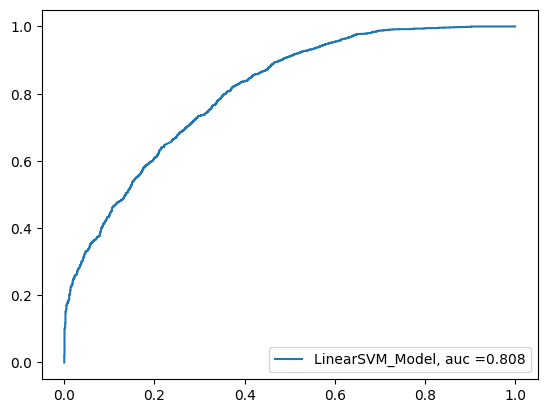

In [58]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodlogmodel = linearSVM.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodlogmodel)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodlogmodel)
plt.plot(fpr,tpr,label="LinearSVM_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()


In [ ]:
print(gridCV.best_params_)

# AdaBoost

In [27]:
# import AdaBoost Model 
from sklearn.ensemble import AdaBoostClassifier 

abModel = AdaBoostClassifier(random_state=23)
abModel.fit(bx_train,by_train)
by_pred_abModel = abModel.predict(bx_val)

In [28]:

get_model_results("Ada Boosting", abModel, bx_train,by_train, bx_val, by_val)

Results for Ada Boosting
Accuracy: 0.8238680973567128
Recall: 0.8446088794926004
Precision: 0.808295397066262
F1 Score: 0.8260532437322305

Confusion Matrix:

[[1598  294]
 [ 379 1550]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1929
           1       0.81      0.84      0.83      1892

    accuracy                           0.82      3821
   macro avg       0.82      0.82      0.82      3821
weighted avg       0.82      0.82      0.82      3821



In [ ]:
from sklearn.model_selection import GridSearchCV 
grid_params = {
    'n_estimators': [50,100,200,400],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.01,0.05,0.1,0.2],
}

gridCV = GridSearchCV(abModel, param_grid=grid_params, verbose=False)
gridCV.fit(bx_train,by_train)

In [5]:

print(gridCV.best_params_)


{'n_estimators': 400, 'learning_rate': 0.2, 'algorithm': 'SAMME.R',}


In [30]:
good_AB = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.2, algorithm = 'SAMME.R', random_state=23)

In [32]:
get_model_results("Ada Boost(HyperTuned)", good_AB, bx_train, by_train, bx_val, by_val)

Results for Ada Boost(HyperTuned)
Accuracy: 0.8249149437320074
Recall: 0.8446088794926004
Precision: 0.8099341104916371
F1 Score: 0.8269081500646831

Confusion Matrix:

[[1598  294]
 [ 375 1554]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1929
           1       0.81      0.84      0.83      1892

    accuracy                           0.82      3821
   macro avg       0.83      0.83      0.82      3821
weighted avg       0.83      0.82      0.82      3821



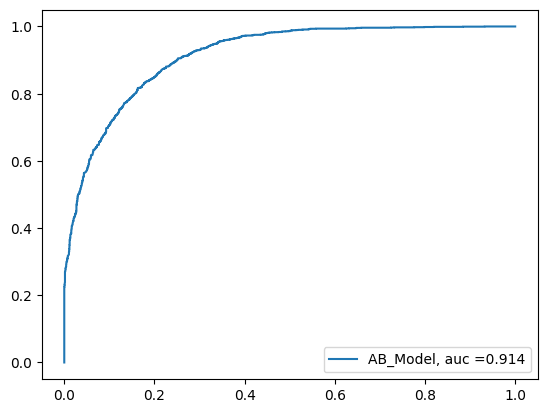

In [33]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodAB = good_AB.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodAB)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodAB)
plt.plot(fpr,tpr,label="AB_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()


# Gradient Boosting

In [40]:
# import Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingClassifier 

gbModel = GradientBoostingClassifier(random_state=23)
gbModel.fit(bx_train,by_train)
y_pred_gbModel = gbModel.predict(bx_val)


In [41]:

get_model_results("Gradient Boosting", gbModel, bx_train,by_train, bx_val, by_val)

Results for Gradient Boosting
Accuracy: 0.8249149437320074
Recall: 0.8409090909090909
Precision: 0.812149055640633
F1 Score: 0.8262788886003636

Confusion Matrix:

[[1591  301]
 [ 368 1561]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1929
           1       0.81      0.84      0.83      1892

    accuracy                           0.82      3821
   macro avg       0.83      0.83      0.82      3821
weighted avg       0.83      0.82      0.82      3821



In [42]:
from sklearn.model_selection import GridSearchCV 
grid_params = {
    'n_estimators': [50,100,200,400],
    'max_depth': [3,4,5,6,7,8],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'max_leaf_nodes': [2,4,6,8]
}

gridCV = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_params, verbose=False)
gridCV.fit(bx_train,by_train)
print(gridCV.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 200}


In [44]:
good_GB = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, max_leaf_nodes= 8, n_estimators=200)

In [45]:
get_model_results("Gradient Boost(HyperTuned)", good_GB, bx_train, by_train, bx_val, by_val)

Results for Gradient Boost(HyperTuned)
Accuracy: 0.8332897147343628
Recall: 0.8509513742071881
Precision: 0.8193384223918575
F1 Score: 0.8348457350272231

Confusion Matrix:

[[1610  282]
 [ 355 1574]]

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1929
           1       0.82      0.85      0.83      1892

    accuracy                           0.83      3821
   macro avg       0.83      0.83      0.83      3821
weighted avg       0.83      0.83      0.83      3821



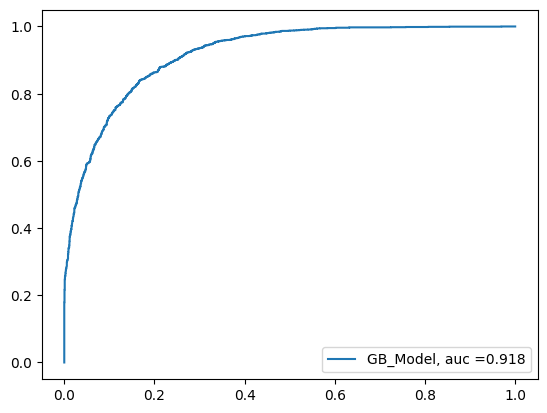

In [46]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodGB = good_GB.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodGB)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodGB)
plt.plot(fpr,tpr,label="GB_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
